# **MAIS 202 Winter 2021 - Assignment 4**
Find the maximum digit in an image!

Each image is 128 pixels in height and 128 pixels in width, for a total of 16,384‬ pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

The file trainx.npy contains all 40 000 training images. The file trainy.csv contains all 40 000 training labels.

The file test_x.npy contains all 10 000 testing images. Please use this file to generate your solutions.

The objective will be to identify the highest integer in the picture

# Download and extract the dataset

In [1]:
# Imports
# to download the dataset
from google.colab import files
# to do maths
import numpy as np
# to deal with csv files
import pandas as pd
# to visualize the images
import matplotlib.pyplot as plt
# to create the model and save/load it
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
# Download the dataset
files.upload() #upload kaggle.json
# The kaggle.json file is found in the 'Account' tab of your user profile 
# (https://www.kaggle.com/<username>/account) after selecting 'Create API Token'. 

!pip install -q kaggle --upgrade
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c mais-202-winter-2021-kaggle-comp

Saving kaggle.json to kaggle.json
kaggle.json
 99% 194M/196M [00:02<00:00, 93.1MB/s]
100% 196M/196M [00:02<00:00, 96.9MB/s]
100% 780M/784M [00:08<00:00, 86.1MB/s]
100% 784M/784M [00:09<00:00, 91.0MB/s]
  0% 0.00/341k [00:00<?, ?B/s]
100% 341k/341k [00:00<00:00, 131MB/s]


In [3]:
# Extract the files 
!unzip -q mais-202-winter-2021-kaggle-comp.zip -d .
!unzip -q test_x.npy.zip -d .
!unzip -q train_x.npy.zip -d .

unzip:  cannot find or open mais-202-winter-2021-kaggle-comp.zip, mais-202-winter-2021-kaggle-comp.zip.zip or mais-202-winter-2021-kaggle-comp.zip.ZIP.


# Load and visualize the dataset

In [4]:
# Load npy files into numpy arrays
train_images = np.load("train_x.npy")
test_images = np.load("test_x.npy")

In [5]:
# Store the labels from the csv file into numpy array
train_y = pd.read_csv("train_y.csv") 
train_y = [label for label in train_y['Label']]
train_y = np.array(train_y)

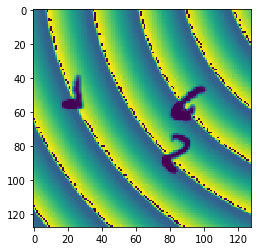

In [6]:
# Visualize the images
def show_image(arr):
    two_d = (np.reshape(arr, (128, 128)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image we want to display

# Classification

In [7]:
# Reshape the images into a (N, H, W, 1) sized array, where N is the number of 
# images and H, W are the dimensions of the image.
train_x = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_x = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
print('Matrix Shape (N, H, W, 1):', train_x.shape)

Matrix Shape (N, H, W, 1): (40000, 128, 128, 1)


In [8]:
# Convert the values from int to float 
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
# Normalize the images 
max_RGB_value = 255
train_x /= max_RGB_value 
test_x /= max_RGB_value 

In [9]:
networks = 10
model = [0] *networks
for i in range(networks):
  # Creating a Sequential Model and adding the layers
  model[i] = Sequential()
  # a mix of strides and max pooling has proven to be more efficient
  model[i].add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=train_x.shape[1:]))
  model[i].add(MaxPooling2D(pool_size=(2, 2)))
  model[i].add(Conv2D(64, kernel_size=(3,3), strides=(2,2), padding='same', input_shape=train_x.shape[1:]))
  # bring the arrays to 1D for fully connected layers
  model[i].add(Flatten()) 
  model[i].add(Dense(128, activation=tf.nn.relu))
  model[i].add(Dropout(0.2))
  # last dense must be 10 for the number of classes i.e. {0,1,2,3,4,5,6,7,8,9}
  model[i].add(Dense(10,activation=tf.nn.softmax)) 

In [10]:
# train the model
for i in range(networks):
  model[i].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model[i].fit(x=train_x,y=train_y, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 46s 11ms/step - loss: 2.0387 - accuracy: 0.2437
Epoch 2/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8858 - accuracy: 0.2692
Epoch 3/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8649 - accuracy: 0.2678
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8091 - accuracy: 0.2940
Epoch 5/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7012 - accuracy: 0.3372
Epoch 6/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5578 - accuracy: 0.3926
Epoch 7/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4162 - accuracy: 0.4420
Epoch 8/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2821 - accuracy: 0.4879
Epoch 9/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1950 - accuracy: 0.5232
Epoch 10/10
1250/1250 [==============================] - 14s 11m

In [ ]:
# Uncomment this part to mount drive 
#from google.colab import drive
#drive.mount('/content/gdrive')

# uncomment this part to save a model
#model.save('/gdrive/MyDrive/saved_model/')

# uncomment this part to load a model
#model = keras.models.load_model('/gdrive/MyDrive/saved_model/')

Mounted at /content/gdrive
INFO:tensorflow:Assets written to: /gdrive/MyDrive/saved_model/assets


In [11]:
# create an array for the predictions 
predictions = np.zeros( (test_images.shape[0],10) ) 

for i in range(networks):
  predictions += model[i].predict(test_x)

predictions = np.argmax(predictions,axis = 1)

In [ ]:
# store the results into a csv file
data_frame = pd.DataFrame({'ID': np.array(range(10000)), 'Category': predictions})
data_frame.to_csv('results.csv', index=False)

Prediction :  9
Truth :  7
Image : 


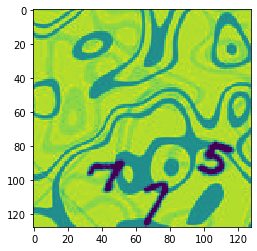

Prediction :  9
Truth :  5
Image : 


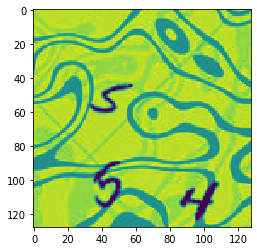

Prediction :  7
Truth :  9
Image : 


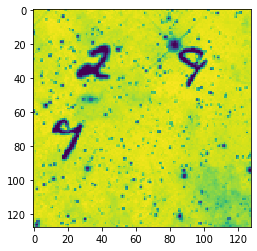

Prediction :  9
Truth :  8
Image : 


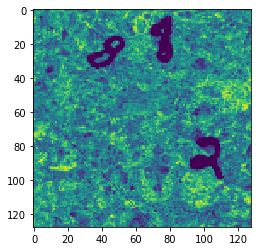

Prediction :  4
Truth :  6
Image : 


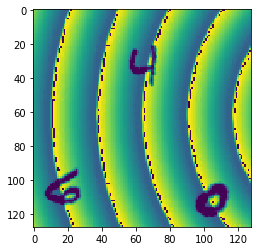

Prediction :  9
Truth :  5
Image : 


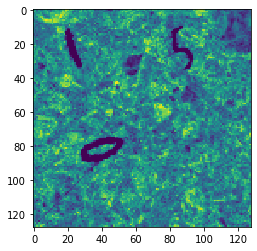

Prediction :  9
Truth :  7
Image : 


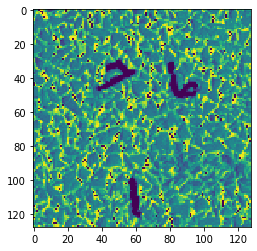

Prediction :  8
Truth :  9
Image : 


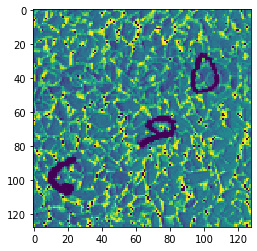

Prediction :  9
Truth :  9
Image : 


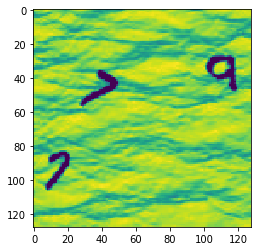

Prediction :  9
Truth :  8
Image : 


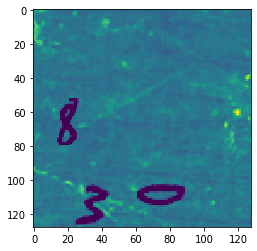

Prediction :  9
Truth :  7
Image : 


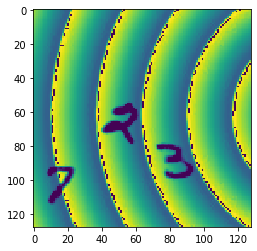

Prediction :  9
Truth :  9
Image : 


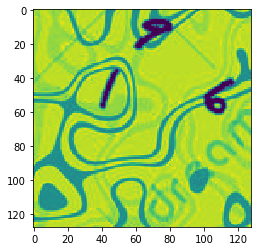

Prediction :  8
Truth :  9
Image : 


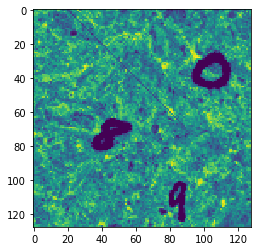

Prediction :  9
Truth :  9
Image : 


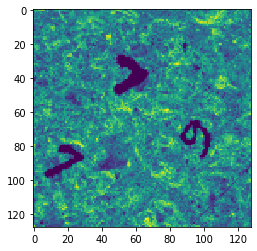

Prediction :  9
Truth :  5
Image : 


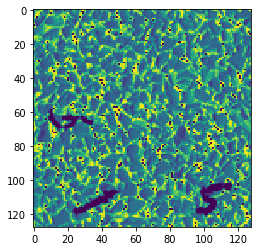

Prediction :  9
Truth :  6
Image : 


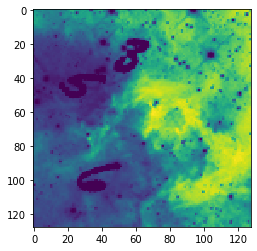

Prediction :  9
Truth :  9
Image : 


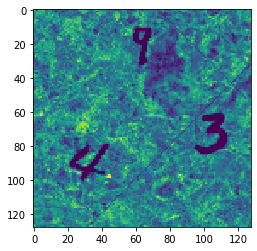

Prediction :  9
Truth :  7
Image : 


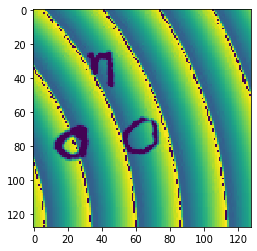

Prediction :  7
Truth :  8
Image : 


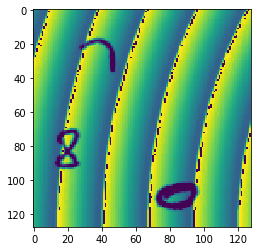

Prediction :  7
Truth :  6
Image : 


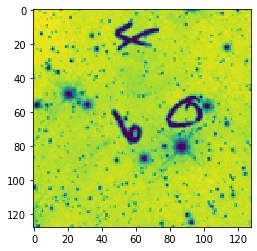

Prediction :  9
Truth :  9
Image : 


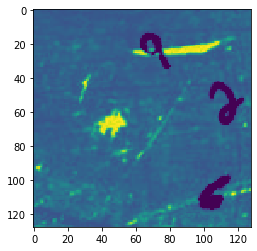

Prediction :  9
Truth :  9
Image : 


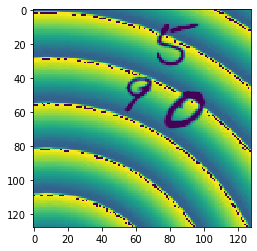

Prediction :  9
Truth :  6
Image : 


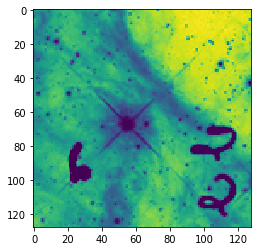

Prediction :  9
Truth :  5
Image : 


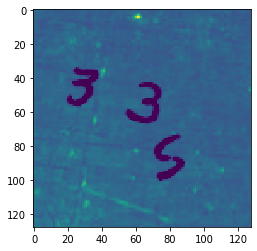

Prediction :  8
Truth :  6
Image : 


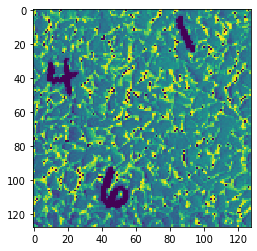

In [13]:
# manually built label array
test_y = np.array([7,5,9,8,6,5,7,9,9,8,7,9,9,9,5,6,9,7,8,6,9,9,6,5,6])
# test the predictions
for i in range(25):
  print("Prediction : ", predictions[i])
  print("Truth : ", test_y[i] )
  print("Image : ")
  show_image(test_images[i])

In [18]:
# check accurracy on first 25 images
loss_and_metrics = [model[i].evaluate(test_x[:25], test_y, verbose=2) for i in range(networks)]

1/1 - 0s - loss: 2.8872 - accuracy: 0.4400
1/1 - 0s - loss: 3.1050 - accuracy: 0.2400
1/1 - 0s - loss: 1.7527 - accuracy: 0.3600
1/1 - 0s - loss: 1.7496 - accuracy: 0.3600
1/1 - 0s - loss: 2.1841 - accuracy: 0.4400
1/1 - 0s - loss: 1.7456 - accuracy: 0.3600
1/1 - 0s - loss: 3.1298 - accuracy: 0.2400
1/1 - 0s - loss: 2.3897 - accuracy: 0.2800
1/1 - 0s - loss: 1.7496 - accuracy: 0.3600
1/1 - 0s - loss: 2.8406 - accuracy: 0.1600
